# Fitbit's Automatically Assessed Stress
Fitbit Sense users see a daily Stress Management Score in the Fitbit app ranging from 1 to 100 – where a higher number means you’re showing fewer physical signs of stress. It’s calculated based on three metrics: your Responsiveness (score out of 30), Exertion Balance (score out of 40) and Sleep Patterns (score out of 30).

Fitbit's stress score has daily granularity.

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
cmap1='seismic'
sns.set_palette(sns.color_palette(cmap1))

In [3]:
# loading the data

data=pd.read_pickle('data/fitbit_sema_outliers_nans_replaced.pkl')
data.columns

Index([             'nightly_temperature',                           'nremhr',
                                  'rmssd',        'full_sleep_breathing_rate',
                           'stress_score',          'sleep_points_percentage',
             'exertion_points_percentage', 'responsiveness_points_percentage',
            'daily_temperature_variation',                         'calories',
              'filteredDemographicVO2Max',                         'distance',
                                    'bpm',           'lightly_active_minutes',
              'moderately_active_minutes',              'very_active_minutes',
                      'sedentary_minutes',                       'resting_hr',
                         'sleep_duration',              'minutesToFallAsleep',
                          'minutesAsleep',                     'minutesAwake',
                     'minutesAfterWakeup',                 'sleep_efficiency',
                       'sleep_deep_ratio',          

<AxesSubplot:>

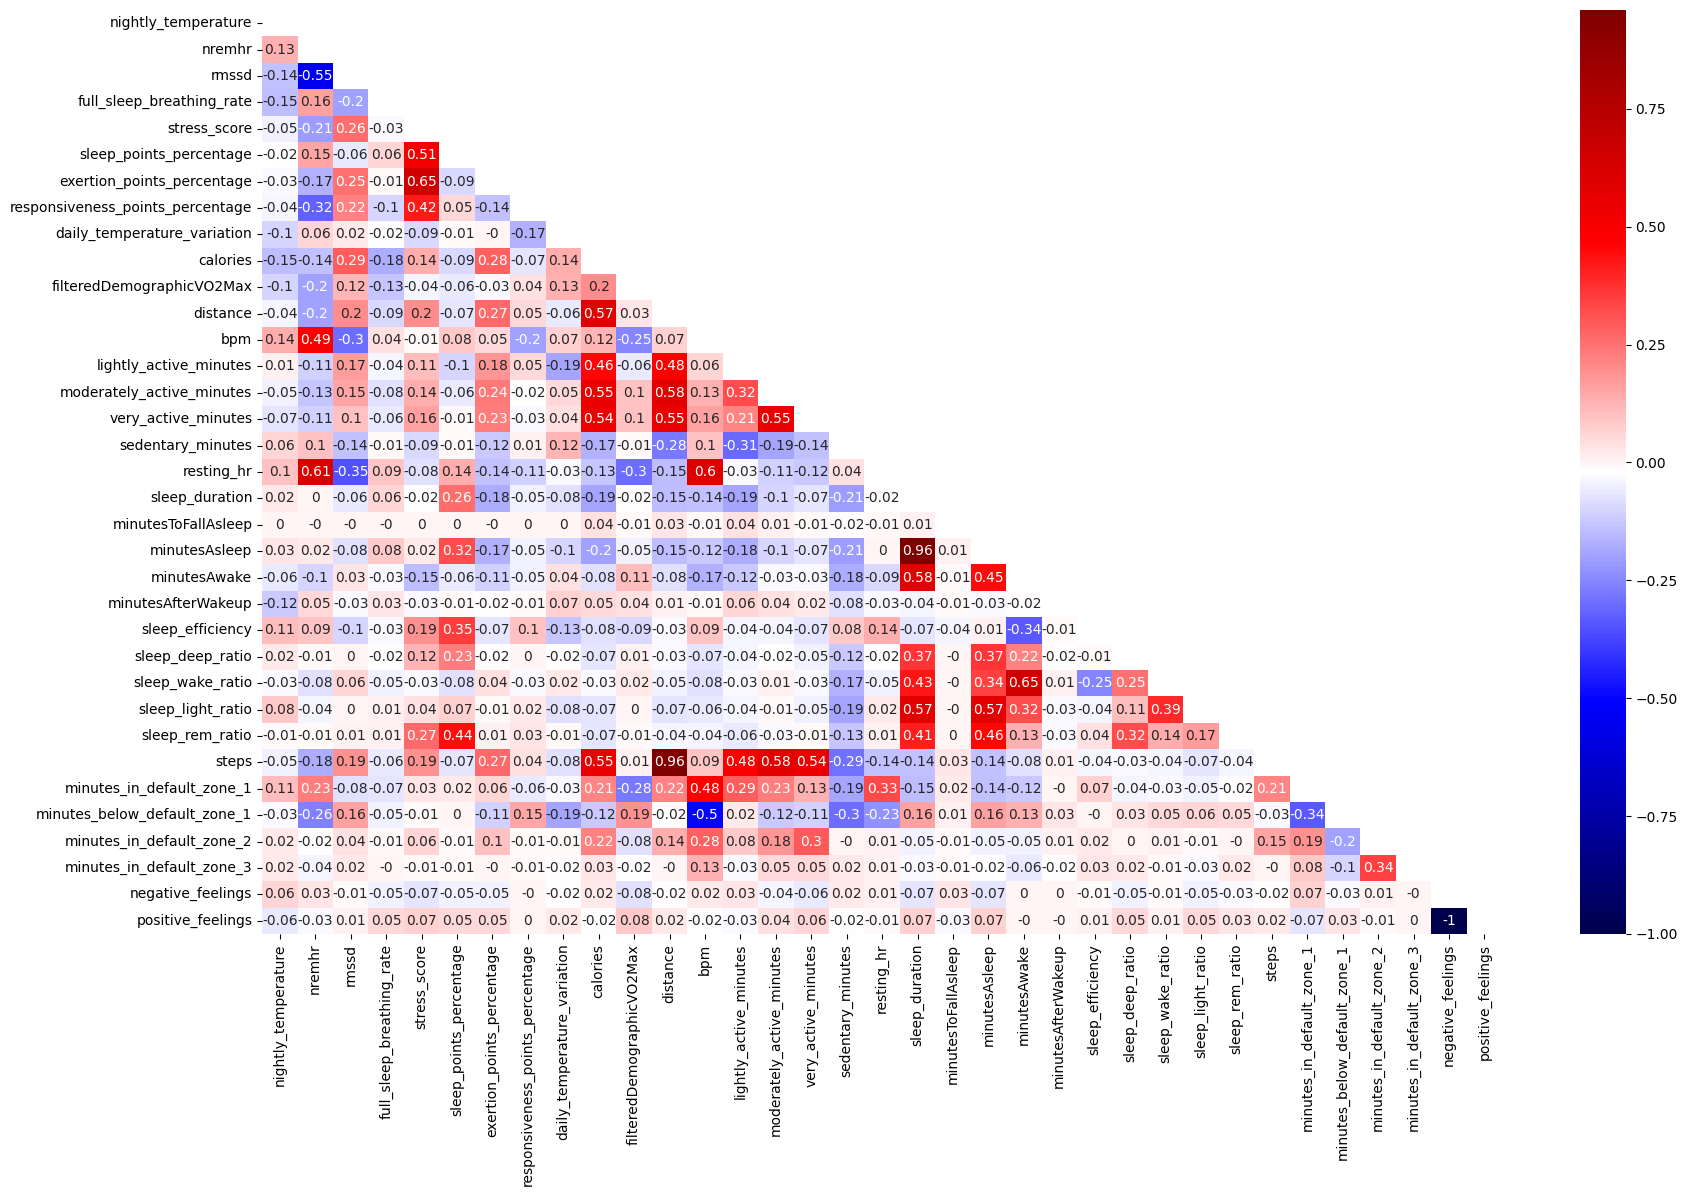

In [4]:
fig = plt.gcf()
fig.set_size_inches(20, 12)
df=data[[ 'nightly_temperature',                           'nremhr',
                                  'rmssd',        'full_sleep_breathing_rate',
                           'stress_score',          'sleep_points_percentage',
             'exertion_points_percentage', 'responsiveness_points_percentage',
            'daily_temperature_variation',                         'calories',
              'filteredDemographicVO2Max',                         'distance',
                                    'bpm',           'lightly_active_minutes',
              'moderately_active_minutes',              'very_active_minutes',
                      'sedentary_minutes',                       'resting_hr',
                         'sleep_duration',              'minutesToFallAsleep',
                          'minutesAsleep',                     'minutesAwake',
                     'minutesAfterWakeup',                 'sleep_efficiency',
                       'sleep_deep_ratio',                 'sleep_wake_ratio',
                      'sleep_light_ratio',                  'sleep_rem_ratio',
                                  'steps',        'minutes_in_default_zone_1',
           'minutes_below_default_zone_1',        'minutes_in_default_zone_2',
              'minutes_in_default_zone_3',                'negative_feelings',
                      'positive_feelings']]
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap1,mask=mask)
#plt.savefig("visualizations/correlation_matrix_fitbit_stress_semas.png",bbox_inches='tight')

In [5]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data['stress_score'], data['negative_feelings'])
print('Pearsons correlation stress_score vs. negative_feelings: %.2f' % corr)

Pearsons correlation stress_score vs. negative_feelings: -0.07


In [6]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data['stress_score'], data['positive_feelings'])
print('Pearsons correlation stress_score vs. positive_feelings: %.2f' % corr)

Pearsons correlation stress_score vs. positive_feelings: 0.07
